# The Relationship between Fuel Efficiency and Fuel Type

## Are Gasoline or Diesel-based engines more efficient?
Group Members: Blaise Appolinary, Zibo Shang, William Suryawidjaja

## 1. Introduction

As human civilization expands, metropolitan cities are growing rapidly. As a result, the bigger commuting zone has resulted in the rising demands for a form of transport that is cost-efficient, yet provides a sense of privacy for the passenger; the car. 

Given that, choosing the right car could be a difficult decision to make, as the car types range from family vehicles like sedans and coupes to the high-end, exotic, sport vehicles. In all car types, however, a critical factor to consider is the fuel efficiency. A more efficient car would allow customers to save money on fuel as well as reduce carbon footprints. 

According to a research conducted by the Universal Technical Institute, they found that diesel cars have 20% more thermal efficiency than gasoline cars. This would suggest that diesel-based cars are more efficient gasoline-based cars, as the former are able to transfer heat to energy more efficiently. (Baures, 2019; Chevrolet, 2021; Gas vs. Diesel Engines: What’s the Difference?, 2021). As a follow up to this reserach paper, we have decided to investigate this claim by taking a different measure of fuel efficiency, MPG. 

* MPG (miles per gallon), is defined as the distance (measured in miles) that a vehicle can travel per gallon of fuel. If a car has a high MPG value, it would suggest that the car is more fuel-efficient. 

For this project, we will be comparing the means as well as the standard deviations of MPG between diesel-based cars and gasoline-based cars, which would allow us to determine which fuel type is more efficient. Our results will be based on a dataset of Vehicle Fuel Economy Estimates, from 1984-2017, obtained from Kaggle.

<img src="https://raw.githubusercontent.com/Zibo-S/STAT201_GP_7/main/intro_pic_2.png" width="400" height="400" align="center"/>

Fig 1.1 Introduction Picture (*What Is the Difference Between Diesel and Gas? Sweeney Chevrolet. 2021*)

## 2. Preliminary Results

In [1]:
library(tidyverse)
library(infer)
#library(datateachr)
library(testthat)
library(digest)
library(broom)
#library(cowplot)
library(dplyr)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following object is masked from ‘package:tidyr’:

    matches




### 2.1 Importing the dataset from Kaggle and loading the data into the Jupyter Notebook

In [2]:
df <- read.csv("https://raw.githubusercontent.com/Zibo-S/STAT201_GP_7/main/database.csv", header = TRUE) 
     
head(df)


,Vehicle.ID,Year,Make,Model,Class,Drive,Transmission,Transmission.Descriptor,Engine.Index,Engine.Descriptor,⋯,Hours.to.Charge..AC.240V.,Composite.City.MPG,Composite.Highway.MPG,Composite.Combined.MPG,Range..FT1.,City.Range..FT1.,Highway.Range..FT1.,Range..FT2.,City.Range..FT2.,Highway.Range..FT2.
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,⋯,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,,Manual 5-Speed,,9001,(FFS),⋯,0,0,0,0,0,0,0,,0,0
2,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,,Manual 5-Speed,,9005,(FFS) CA model,⋯,0,0,0,0,0,0,0,,0,0
3,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,,Manual 5-Speed,,9002,(FFS),⋯,0,0,0,0,0,0,0,,0,0
4,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,,Manual 5-Speed,,9006,(FFS) CA model,⋯,0,0,0,0,0,0,0,,0,0
5,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,,1830,(FFS),⋯,0,0,0,0,0,0,0,,0,0
6,28426,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,,1880,(FFS) CA model,⋯,0,0,0,0,0,0,0,,0,0


Fig 1.1 The uncleaned dataset

### 2.2 Tidying and Cleaning Up Dataset

In [3]:
table(df %>% select('Fuel.Type'))


                        CNG                      Diesel 
                         60                        1014 
                Electricity             Gasoline or E85 
                        133                        1223 
    Gasoline or natural gas         Gasoline or propane 
                         20                           8 
                   Midgrade                     Premium 
                         77                       10133 
    Premium and Electricity  Premium Gas or Electricity 
                         25                          18 
             Premium or E85                     Regular 
                        122                       25258 
Regular Gas and Electricity  Regular Gas or Electricity 
                         20                           2 

Fig 1.2 The fuel type categories and the corresponding number of examples

The dataset that we obtained contains a plethora of different Fuel Types. However, for the purpose of the project, we will only be focusing on two categories of Fuel Types, which are "Diesel" and "Gasoline or E85". There are a several categories of Fuel Types that are marked as "Gasoline" cars, but we have specifically chosen the "Gasoline or E85" tag as the number of examples in that category are similar in number to the diesel tags (Diesel - 1014 Examples, Gasoline or E85 - 1223). Hence, we will filter the dataset for only the examples that have one of the two Fuel Types.

The factors that we are interested in are:
- MPG in the City (mean, interquartile): 
- MPG in the Highway (mean, interquartile);

The dataset that we are working with has two different types of MPG, City and Highway, which represents the MPG when driving on the corresponding terrains. We have decided to explore them both. The chosen factors have corresponding columns in the dataset, called City.MPG..FT1 (MPG in the city) in the unit miles and Highway.MPG..FT1 (MPG on the highway) in the unit miles. Hence, we will select only these columns as well as the Fuel.Types column before we move on with the rest of the investigation. We will also rename the columns for simplicity.

In [4]:
tidy_data <- df %>%
       filter(Fuel.Type == "Diesel" | Fuel.Type == "Gasoline or E85") %>%
       select('Fuel.Type','City.MPG..FT1.', 'Highway.MPG..FT1.') %>%
       rename(Fuel_Type = Fuel.Type, City_MPG = City.MPG..FT1., Highway_MPG = Highway.MPG..FT1.)
head(tidy_data)

,Fuel_Type,City_MPG,Highway_MPG
,<chr>,<int>,<int>
1,Diesel,21,31
2,Diesel,21,29
3,Diesel,21,31
4,Diesel,21,31
5,Diesel,21,29
6,Diesel,21,31


### 2.3 Calculating Sample Parameters 

To start our analysis, we will calculate the Mean and IQR for each factor that we are interested in.

In [5]:
filtered_data <- tidy_data %>% filter(Fuel_Type == "Diesel") %>% select(Fuel_Type, City_MPG)

#City_MPG_Mean
diesel_mean <- mean(as.numeric(as.vector(filtered_data$City_MPG)))
paste("Mean of Diesel in City: ",diesel_mean)

diesel_IQR <- IQR(as.numeric(as.vector(filtered_data$City_MPG)))
paste("IQR of Diesel in City: ",diesel_IQR)

[1] "Mean of Diesel in City:  21.2258382642998"

[1] "IQR of Diesel in City:  10"

In [6]:
filtered_data2 <- tidy_data %>% filter(Fuel_Type == "Gasoline or E85") %>% select(Fuel_Type, City_MPG)

gasoline_mean <- mean(as.numeric(as.vector(filtered_data2$City_MPG)))
paste("Mean of Gasoline in City: ",gasoline_mean)

gasoline_IQR <- IQR(as.numeric(as.vector(filtered_data2$City_MPG)))
paste("IQR of Gasoline in City: ",gasoline_IQR)

[1] "Mean of Gasoline in City:  15.4096484055601"

[1] "IQR of Gasoline in City:  4"

In [7]:
filtered_data3 <- tidy_data %>% filter(Fuel_Type == "Diesel") %>% select(Fuel_Type, Highway_MPG)

#City_MPG_Mean
diesel_H_mean <- mean(as.numeric(as.vector(filtered_data3$Highway_MPG)))

paste("Mean of Diesel on Highway: ",diesel_H_mean)

diesel_H_IQR <- IQR(as.numeric(as.vector(filtered_data3$Highway_MPG)))
paste("IQR of Diesel on Highway: ",diesel_H_IQR)

[1] "Mean of Diesel on Highway:  27.1341222879684"

[1] "IQR of Diesel on Highway:  12"

In [8]:
filtered_data4 <- tidy_data %>% filter(Fuel_Type == "Gasoline or E85") %>% select(Fuel_Type, Highway_MPG)

gasoline_H_mean <- mean(as.numeric(as.vector(filtered_data4$Highway_MPG)))

paste("Mean of Gasoline on Highway: ",gasoline_H_mean)

gasoline_H_IQR <- IQR(as.numeric(as.vector(filtered_data4$Highway_MPG)))

paste("IQR of Gasoline on Highway: ",gasoline_H_IQR)

[1] "Mean of Gasoline on Highway:  21.6116107931316"

[1] "IQR of Gasoline on Highway:  7"

In [9]:
summary_means <- tibble("Diesel in City"=diesel_mean , 
                              "Diesel on Highway"=diesel_H_mean, 
                              "Gasoline in City"= gasoline_mean, 
                              "Gasoline on Highway"=gasoline_H_mean
                             )
print("Summary of Means as below")
summary_means

[1] "Summary of Means as below"


Diesel in City,Diesel on Highway,Gasoline in City,Gasoline on Highway
<dbl>,<dbl>,<dbl>,<dbl>
21.22584,27.13412,15.40965,21.61161


From our calculations, we discovered that the diesel cars outperform better than gasoline cars in terms of efficiency for both the city and the highway MPG. However, we will discuss further why we can't draw a conclusion from here.

In [10]:
summary_IQR <- tibble("Diesel in City"=diesel_IQR , 
                             "Diesel on Highway"=diesel_H_IQR, 
                              "Gasoline in City"= gasoline_IQR, 
                              "Gasoline on Highway"=gasoline_H_IQR
                             )
print("Summary of IQR as below")
summary_IQR

[1] "Summary of IQR as below"


Diesel in City,Diesel on Highway,Gasoline in City,Gasoline on Highway
<dbl>,<dbl>,<dbl>,<dbl>
10,12,4,7


As we can see from the table, diesel has a higher IQR range for both the city and highway MPG values. This result suggests that, although the MPG of diesel cars are better on average, the MPG may vary a lot from diesel car to car. Additionally, as the difference in their means is smaller than the difference in IQR values, it also suggests that some gasoline cars might actually be more efficient than diesel cars.

### 2.4 Visualizing the distribution of City MPG and Highway MPG of each group using Histograms
*Note, need to add a center line which is the mean of the group

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


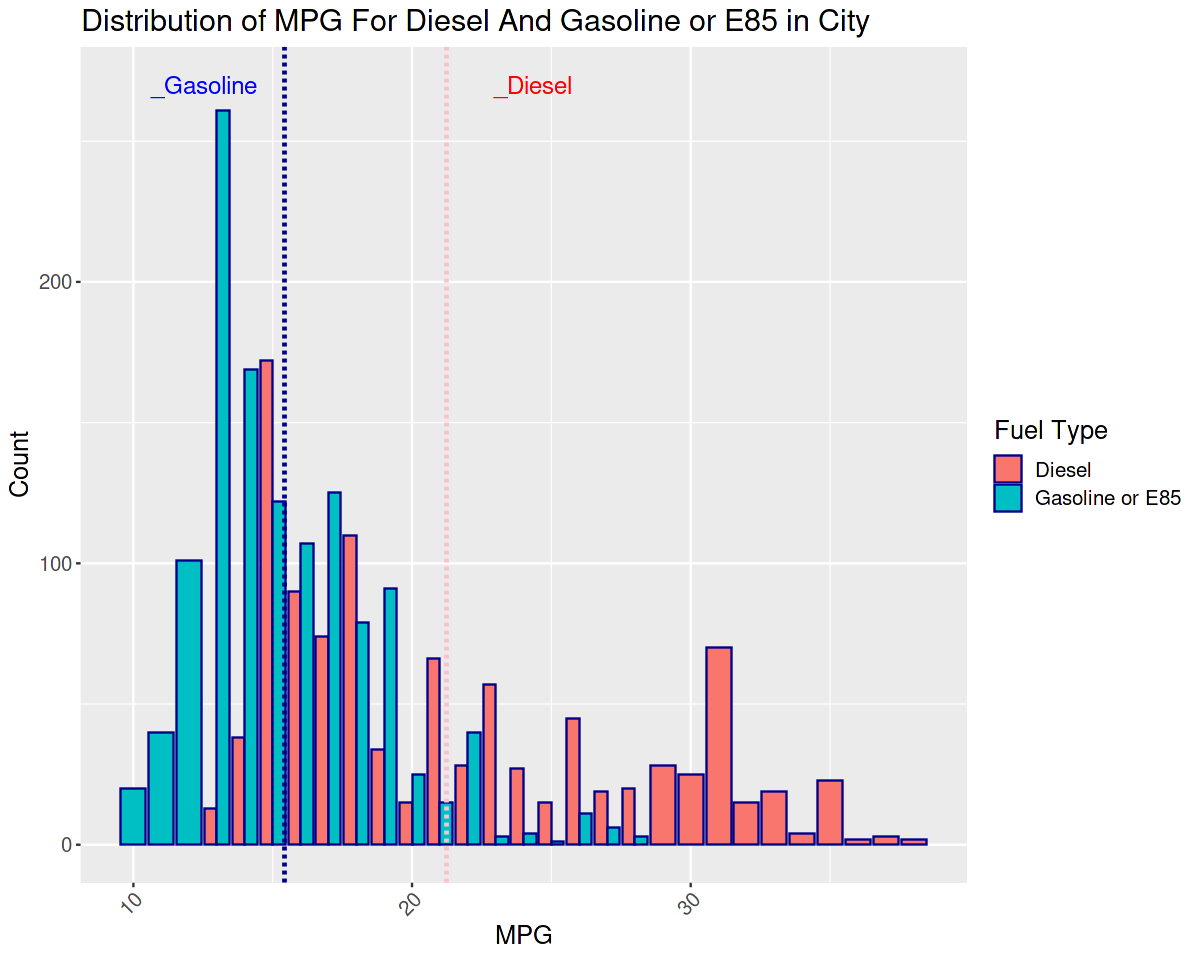

In [11]:
options(repr.plot.width=10, repr.plot.height=8)

City_Histogram <- tidy_data %>%
     select(Fuel_Type, City_MPG) %>%
     ggplot() +
     geom_histogram(aes(x= City_MPG ,fill = Fuel_Type),position="dodge", stat="count",color="darkblue")+
     geom_vline(aes(xintercept = diesel_mean), color = "pink", linetype = 2, lwd = 1)+
    annotate("text", x = diesel_mean+3, y = 270, label = "𝜇_Diesel", color="red", size=5)+
     geom_vline(aes(xintercept = gasoline_mean), color = "darkblue", linetype = 2, lwd = 1)+
    annotate("text", x = gasoline_mean-3, y = 270, label = "𝜇_Gasoline", color="blue", size=5)+
     ggtitle("Distribution of MPG For Diesel And Gasoline or E85 in City") + 
     xlab("MPG") +
     ylab("Count") + 
    theme(text = element_text(size = 15)) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))+
    guides(fill=guide_legend(title="Fuel Type"))
    
City_Histogram

Plot I: *Histogram of the Distribution of MPG For Diesel And Gasoline or E85 In City*

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


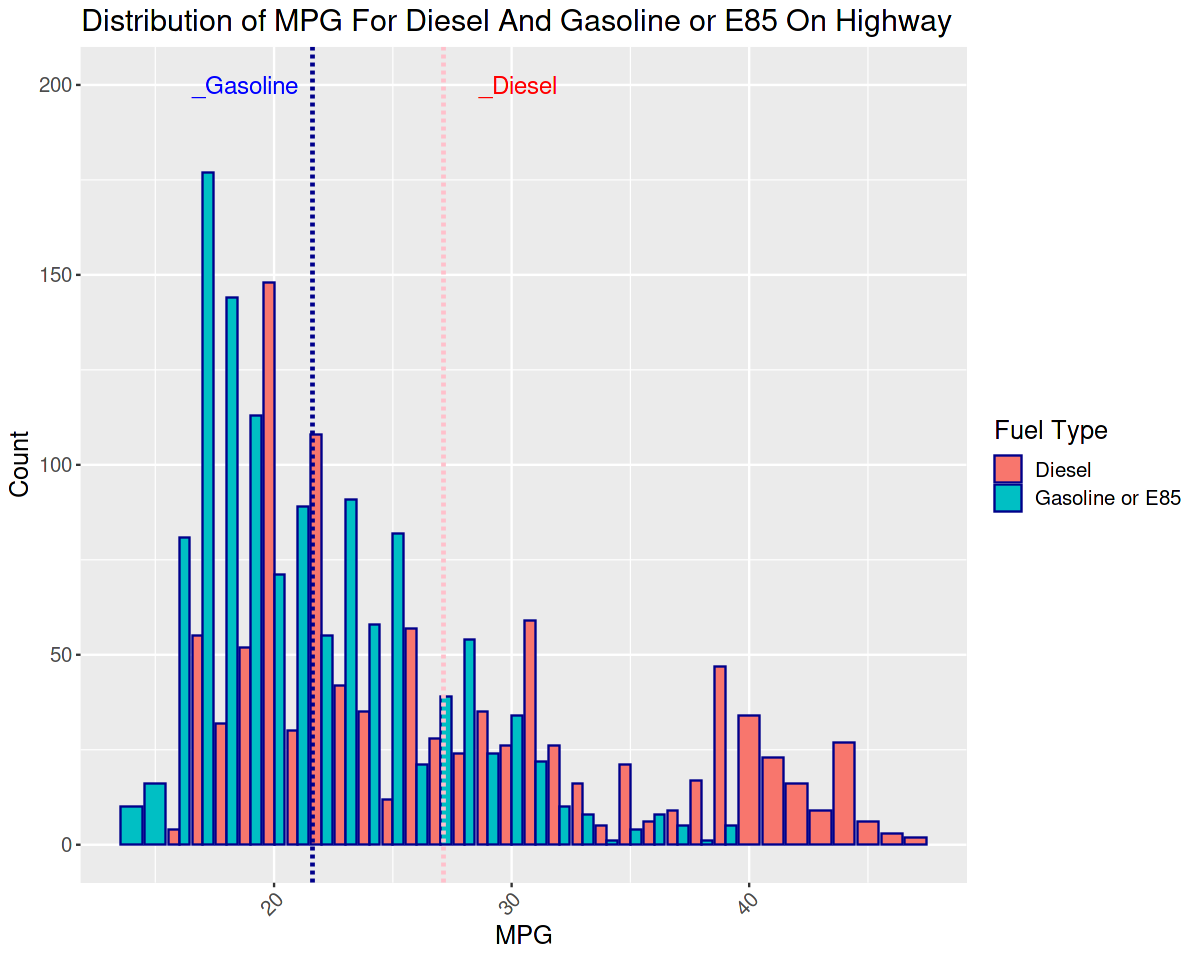

In [12]:
#$df$"Fuel Type 1
Highway_Histogram <- tidy_data %>%
     select(Fuel_Type, Highway_MPG) %>%
     ggplot() +
     geom_histogram(aes(x= Highway_MPG ,fill = Fuel_Type),position="dodge", stat="count",color="darkblue")+
     ggtitle("Distribution of MPG For Diesel And Gasoline or E85 On Highway ") + 
     xlab("MPG") +
     ylab("Count") + 
    theme(text = element_text(size = 15)) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))+
    geom_vline(aes(xintercept = diesel_H_mean), color = "pink", linetype = 2, lwd = 1)+
    annotate("text", x = diesel_H_mean+3, y = 200, label = "𝜇_Diesel", color="red", size=5)+

     geom_vline(aes(xintercept = gasoline_H_mean), color = "darkblue", linetype = 2, lwd = 1)+
    annotate("text", x = gasoline_H_mean-3, y = 200, label = "𝜇_Gasoline", color="blue", size=5)+
guides(fill=guide_legend(title="Fuel Type"))
Highway_Histogram

Plot II: *Histogram of the Distribution of MPG For Diesel And Gasoline or E85 On Highway*

From these histograms, we can see that the distribution of MPG for the diesel and gasoline fuel types are not uniformly distributed; they are unimodal but the distribution is skewed to the right. This is logical as there will be more cars that are less efficient for both fuel types (car manufacturers might focus on lowering the price of the car instead of focusing on efficiency). However, the distribution for the diesel fuel type is much more spread out for both the cases of Highway MPG and City MPG. This observation is captured by the difference in their IQR values. <br>

Diesel: (City: 10, Highway: 12) <br>
Gasoline: (City: 4, Highway: 7)

## 3. Methods

### 3.1 Need for further investigation

Back when we compared the means of the dataset, we found that the mean of diesel (City: 21, Highway: 27) is higher than the mean of gasoline (City: 15, Highway: 21) in both the city and highway MPG. This would suggest that diesel-based cars are more efficient than gasoline-based cars due to a higher MPG. 

However, the dataset that we are working with is only a sample of all the diesel and gasoline cars available. Hence, drawing a conclusion here isn’t justified. To explore the dataset further, we will be performing `two sample z-test` hypothesis tests using bootstrap sampling and asymptotic theory in order to get a more robust conclusion. We will also create confidence intervals to quantify the difference

### 3.2 Assumptions and Hypotheses

An assumption for our hypothesis tests are that the dataset was sampled randomly and each example was independent to one another. This is a fair assumption, as the cars are from different car manufacturers and were produced in different years. As discussed before, our dataset is asymmetrically distributed, which means we would need to have a huge sample size to work with, to have the law of big numbers kick in and utilize a Normal Distribution rather than a t-Distribution. This isn't a problem either, as our dataset has more than 1000 examples for both the diesel and gasoline fuel types. Hence, the approach that we will be taking is justified.

We will be performing 2 `two sample z-tests`; the first for the difference in City MPG and the second for the difference in Highway MPG.  In each case, we will test be testing the following null and alternative hypotheses:

$H_0$: The difference in mean City MPG between Diesel and Gasoline are the same, $\mu_{Diesel, City} - \mu_{Gasoline, City} = 0$. <br>
$\mu_{Diesel, City} = \mu_{Gasoline, City}$. <br>
$H_A$: The difference in mean City MPG between Diesel and Gasoline are different, 
$\mu_{Diesel, City} - \mu_{Gasoline, City} \neq 0$ <br>
$\mu_{Diesel, City} \neq \mu_{Gasoline, City}$. <br>

$H_0$: The difference in mean Highway MPG between Diesel and Gasoline are the same, $\mu_{Diesel, Highway} - \mu_{Gasoline, Highway} = 0$. <br>
$\mu_{Diesel, Highway} = \mu_{Gasoline, Highway}$. <br>
$H_A$: The difference in mean Highway MPG between Diesel and Gasoline are different, $\mu_{Diesel, Highway} -\mu_{Gasoline, Highway} \neq 0$. <br>
$\mu_{Diesel, Highway} \neq \mu_{Gasoline, Highway}$. <br>

### 3.3 Expectations and Further Studies

We expect to find a relation between the factors we have chosen for fuel type and fuel efficiency. From the plot visualization above, we expect diesel fuel has better efficiency on both city roads and highways. 

Knowing these factors can help a vehicle customer decide the type of car to save money on fuel spending. The report also gives the customer an option to compare the results with their driving habits, whether they drive more city roads or highways (if a car is more efficient on a highway than in the city and vice versa). This result could lead to future questions regarding the generality of the studies as we are only comparing cars from a specific time range and a selected number of gasoline and diesel cars brands. The project can be repeated with a dataset based on more recent cars and a wider variety of car brands.

## 4. Hypothesis Testing

### 4.1.1 Hypothesis Testing for City MPG, Bootstrap Sampling Method (5% Significance Level)

The first method of hypothesis test that we will perform is a null hypothesis simulation by using bootstrap sampling. 
The bootstrap sample size is 1000, and we calculate the difference in means of the samples. First, we calculate the observed difference in means between Diesel and Gasoline fuel efficiency and store it in the variable `obs_diff_means`.

In [13]:
obs_diff_means <- tidy_data %>% 
    select(-Highway_MPG) %>%
    specify(City_MPG~Fuel_Type) %>% 
    calculate(stat = "diff in means",order= c( "Diesel", "Gasoline or E85"))%>%
    as.numeric()
cat("The observed difference in means is ",obs_diff_means)

The observed difference in means is  5.81619

To create the null model, we will obtain bootstrap samples of diesel and gasoline fuel types separately, and calculate the difference in means of each sample. AS our $H_0$ states that the difference in means is 0, we will recenter the null distribution to 0.

In [14]:
diesel_data <- tidy_data %>% filter(Fuel_Type == "Diesel")
gasoline_data <- tidy_data %>% filter(Fuel_Type == "Gasoline or E85")
samp_diesel <- diesel_data %>% 
                specify(response = City_MPG) %>%
                generate(type = "bootstrap", reps = 1000) %>%
                calculate(stat = "mean")
samp_gasoline <- gasoline_data %>% 
                specify(response = City_MPG) %>%
                generate(type = "bootstrap", reps = 1000) %>%
                calculate(stat = "mean")
null_model_manual <- samp_diesel %>% inner_join(samp_gasoline, by = "replicate")
null_model_manual <- null_model_manual %>% mutate(diff = stat.x - stat.y) %>% select(replicate, diff)
null_model_manual <- null_model_manual %>% mutate(diff = diff + (0 - obs_diff_means))

null_model_manual

replicate,diff
<int>,<dbl>
1,-0.1335667
2,-0.2070748
3,-0.1106593
⋮,⋮
998,-0.045072178
999,0.002908585
1000,0.265460172


After acquiring the bootstrap samples, we will visualize the distribution of the difference in means by plotting a histogram. We will also add a line to show the observed difference as compared to our null distribution.

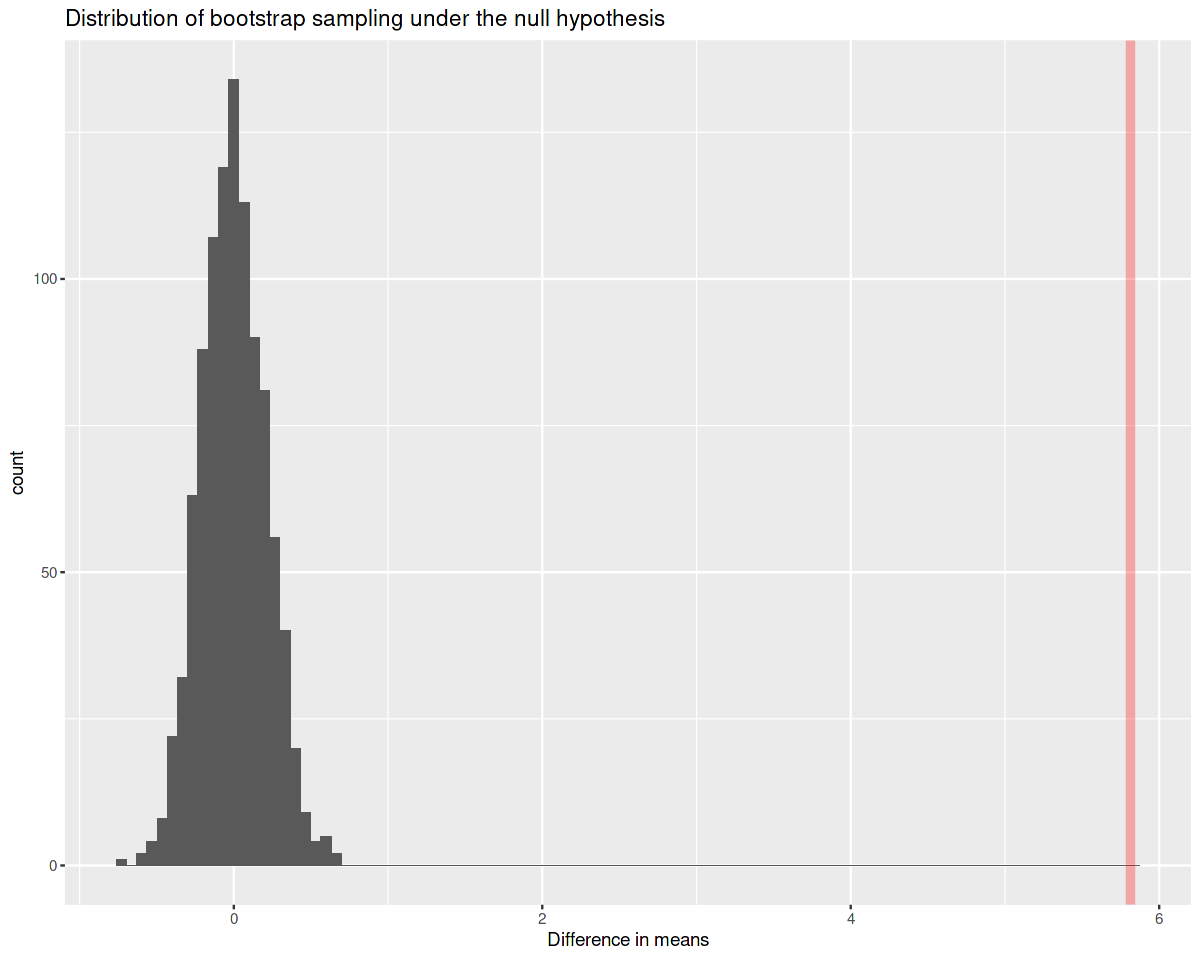

In [15]:
dist_plot_manual <- null_model_manual %>%
                    ggplot() + 
                    geom_histogram(aes(x=diff), bins=100) +
                    xlab("Difference in means")+
                    ggtitle("Distribution of bootstrap sampling under the null hypothesis")+
                    geom_vline(xintercept = obs_diff_means, color = "red", alpha = .3, lwd = 2) 
dist_plot_manual

From the plot above, we see that the observed mean difference is very unlikely under the null hypothesis. We will quantify the likelihood of the observed difference to happen under the null hypothesis by getting the p value and storing it in the variable `p_value`.

In [16]:
p_value <- 2 * mean(null_model_manual$diff > obs_diff_means)
cat("The P value is ",p_value)

The P value is  0

Because we obtained a p-value of 0, we will report the p-value as <0.001 as it is very unlikely to obtain a p-value of 0. As the p value we obtained is much smaller than our significance level, we have enough evidence to reject the null hypothesis. Therefore, we conclude that the fuel efficiency of gasoline cars is different to that of diesel cars in the city.

### 4.1.2 Hypothesis Testing for City MPG, Asymptotic Method (5% Significance Level)

To confirm the results that we obtained in the previous section, we will be repeating the hypothesis test, but this time, using the build in `t.test()` function. As our dataset is big, using the t distribution will be similar to a normal distribution, and hence wouldn't alter our results by a significant amount.

In [17]:
xc_data <- tidy_data %>% filter(Fuel_Type == "Diesel") %>% pull(as.numeric(City_MPG))
yc_data <- tidy_data %>% filter(Fuel_Type == "Gasoline or E85") %>% pull(as.numeric(City_MPG))
city_test <- tidy(
            t.test(x = xc_data, 
                   y = yc_data,
                   alternative = "two.sided", conf.level = 0.9))
#cat("Below is a summary table of the two sample t-test conducted")
#city_test

cat("The P value is ", city_test$p.value)

The P value is  3.997089e-130

In [18]:
city_test

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
5.81619,21.22584,15.40965,26.98404,3.997089e-130,1439.726,5.461427,6.170953,Welch Two Sample t-test,two.sided


Table 4.1: Summary of Two Sampled T Test for City MPG

From the test conducted above,  we again obtained a `p-value` that is smaller than the significance level. Therefore, we have enough evidence to reject the null hypothesis and conclude that the city's MPG means on diesel and gasoline are not the same. 

In the previous method (Bootstrapping), we obtained a p-value that is exactly 0, but this is probably because R has rounded it up, which makes sense as the exact p-value is very small. Bootstrapping is still prone to sampling variation whereas the asymptotic method isn’t. On top of that, bootstrapping is expensive as it requires sampling a lot of times. In addition, we are able to calculated a more precise value which is very small in comparison. As our dataset satisfies all the assumptions for CLT, using the asymptotic theory would be preferrable. But, in conclusion, the results obtained through asymptotics agree with the ones obtained through bootstrapping.

### 4.2 Hypothesis Testing for Highway MPG, Asymptotic Method (5% Significance Level)

Similarly, we will repeat the same hypothesis as before, but for the HighwayMPG variable this time around. For the sake of a more precise value, we will be using the t.test() function as we did before.

In [19]:
xh_data <- tidy_data %>% filter(Fuel_Type == "Diesel") %>% pull(as.numeric(Highway_MPG))
yh_data <- tidy_data %>% filter(Fuel_Type == "Gasoline or E85") %>% pull(as.numeric(Highway_MPG))
hway_test <- tidy(
            t.test(x = xh_data, 
                   y = yh_data, 
                   alternative = "two.sided", conf.level = 0.9))

cat("The P value is ", hway_test$p.value)

The P value is  2.834465e-73

In [20]:
hway_test

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
5.522511,27.13412,21.61161,19.08213,2.834465e-73,1593.575,5.046202,5.998821,Welch Two Sample t-test,two.sided


Table 4.2: Summary of Two Sampled T Test for Highway MPG

From the test conducted above,  we obtained a `p-value` that is lower than our significance level. Therefore, we have enough evidence to reject the null hypothesis and conclude that the difference in Highway's MPG means on diesel and gasoline are not the same.  

## 5. Confidence Intervals

In the previous section, we have proven through hypothesis testing that the MPG difference in means of diesel and gasoline based cars are different. But, to quantify how different these values are, we need to create a confidence interval that could estimate the actual difference in the efficiency of the cars.

### 5.1 90% Confidence Interval for City MPG

We will use bootstrapping method to obtain a 90% confidence interval of the difference in means in City MPG, from 1000 bootstrap samples.

In [21]:
city_conf <- tidy_data %>%
                specify(formula = City_MPG ~ Fuel_Type) %>%
                generate(reps = 1000, type = "bootstrap") %>%
                calculate(stat = "diff in means", order = c("Diesel", "Gasoline or E85"))%>%
                get_confidence_interval(level = 0.90, type = "percentile")
city_conf


lower_ci,upper_ci
<dbl>,<dbl>
5.465412,6.180118


As such, we are 90% confident that the difference in means between diesel and gasoline MPG in the city is between 5.470094 and 6.158715. This means that if we retake a sample from our sample, we would have a 90% chance that the difference in means between diesel and gasoline MPG in the city of the sample, is captured by the confidence interval.

Recall that from Section 4.1, we obtained a confidence interval of (5.461427,6.170953) by using the two-sample-t-test. This is very similar to the confidence interval that we obtained here, which supports our results.

### 5.2 90% Confidence Interval for Highway MPG

Again, we will repeat the bootstrapping method to obtain a 90% confidence interval of the difference in means in Highway MPG, from 1000 bootstrap samples.

In [22]:
highway_conf <- tidy_data %>%
                specify(formula = Highway_MPG ~ Fuel_Type) %>%
                generate(reps = 1000, type = "bootstrap") %>%
                calculate(stat = "diff in means", order = c("Diesel", "Gasoline or E85"))%>%
                get_confidence_interval(level = 0.90, type = "percentile")
highway_conf


lower_ci,upper_ci
<dbl>,<dbl>
5.070302,5.98932


As such, we are 90% confident that the difference in means between diesel and gasoline MPG on the highway is between 5.035987 and 6.028125. This means that if we retake a sample from our population, we would have a 90% chance that the difference in means between diesel and gasoline MPG on the highway of the sample, is captured by the confidence interval.

Recall that from section 4.2, we obtained a confidence interval of (5.046202,5.998821) by using two sample-t-test. This is again very similar to the confidence interval we obtained here, which supports our results.

## 7.  Results

From the results of our hypothesis tests, we have reported that for both the City and Highway MPG, the mean of Diesel and Gasoline-based cars are different. In addition, from our confidence intervals, we are 90% confident that the difference between the means is a positive value, which suggests that the mean of Diesel MPG is higher than the mean of Gasoline MPG. As such, we can conclude that the efficiency of Diesel-based cars outperforms the efficiency of Gasoline-based cars in both the city and the highway, which aligns with the results obtained by the Universal Technical Institute. 

These results were what we expected to find given our Preliminary Results, but our findings weren't concrete before performing the hypothesis tests (as the dataset is a sample, not the population). The hypothesis tests and confidence intervals simply confirmed our initial observations. These findings would suggest buyers to purchase a diesel-based car over a gasoline-based car, but with that being said, our findings are very limited to the car brands and the year of manufacture between 1984-2017, as our findings were based on a sample. The investigation can be repeated using more brands and newer models to expand the scope of our claim. 

## 8. References 
Baures, L. (2019, July 16). Pickup Trucks: Gas vs Diesel. Trusted Auto Professionals. https://tap.fremontmotors.com/pickup-trucks-gas-vs-diesel/

Chevrolet, S. (2021, March 10). What Is the Difference Between Diesel and Gas? Sweeney	Chevrolet. https://www.sweeneychevrolet.com/blog/what-is-the-difference-between-diesel-and-gas/

Gas vs. Diesel Engines: What’s the Difference? (2021). UTI Corporate. https://www.uti.edu/blog/diesel/gas-vs-diesel-engines